In [1]:
from qiskit import *
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel

In [2]:
provider = IBMQ.load_account()
provider.backends()

/home/w41g87/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
device = provider.get_backend('ibmq_athens')
properties = device.properties()
coupling_map = device.configuration().coupling_map

In [25]:
circuit = QuantumCircuit(3, 3)
circuit.h([0, 1])
circuit.ccx(0, 1, 2)
circuit.measure(range(3), range(3))

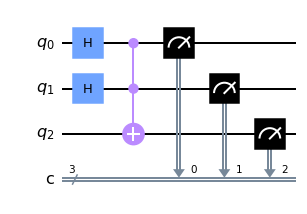

In [26]:
circuit.draw(output='mpl')

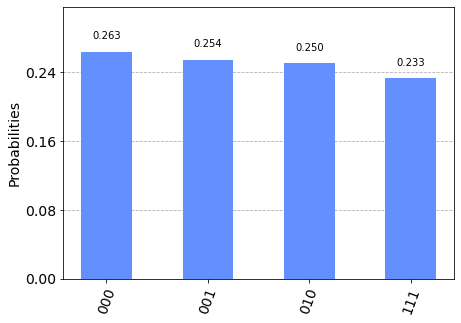

In [27]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()
plot_histogram(result.get_counts(circuit))

In [5]:
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

In [6]:
print(coupling_map)

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


In [8]:
print(noise_model)
print(noise_model.to_dict())

NoiseModel:
  Basis gates: ['cx', 'id', 'sx', 'u3', 'x']
  Instructions with noise: ['reset', 'sx', 'cx', 'id', 'x', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [1, 2]), ('cx', [2, 1]), ('cx', [1, 0]), ('cx', [0, 1]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]
{'errors': [{'type': 'qerror', 'operations': ['id'], 'instructions': [[{'name': 'kraus', 'qubits': [0], 'params': [array([[-0.99989969+0.j,  0.        +0.j],
       [ 0.        +0.j, -0.99962745+0.j]]), array([[-0.00914154+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.00914403+0.j]]), array([[0.        +0.j, 0.    

In [31]:
resultN = execute(circuit, simulator,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()

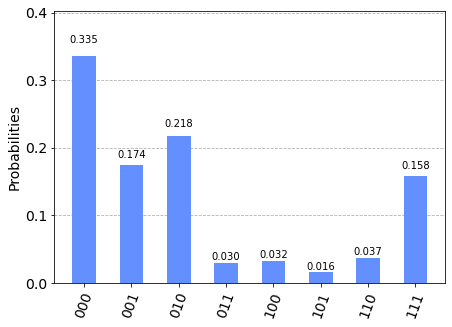

In [32]:
plot_histogram(resultN.get_counts(circuit))

In [ ]:
reset_noise = noise.NoiseModel()